In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
from random import choice


In [2]:
BASE_WORKDIR='data/iops2/'



In [11]:

def read_values(backend, test_subject, test_type, mix_type, vars_dict):

    for var in vars_dict.keys():

        path = BASE_WORKDIR + '/' + backend + '/' + test_subject + '/' + test_type + '/' + str(var) + '/' + mix_type + '/'
        
        for filename in os.listdir(path):
            f = open(path + filename, 'r')
            value = f.read().strip('\n')
            vars_dict[var].append(int(value))
            
            
            f.close()
            
    return vars_dict
            
            
            
            
def plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, figname):
    
    x = np.arange(1,len(x_labels)+1)

    plt.bar(x-0.125, y_host, color='r', width = 0.25)
    plt.bar(x+0.125, y_pod, color='b', width = 0.25)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(x, x_labels)
    
    red_patch = mpatches.Patch(color='red', label='Host')
    blue_patch = mpatches.Patch(color='blue', label='Pod')
    plt.legend(handles=[red_patch,blue_patch])


    plt.savefig(figname)
    plt.show()


def take_median(vars_dict):
    medians_list = []
    #print sorted(vars_dict.keys())
    for key in sorted(vars_dict.keys()):
        median = np.median(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        medians_list.append(median)
     #   print medians_list
        
    return np.asarray(medians_list)

def take_mean(vars_dict):
    means_list = []
    for key in sorted(vars_dict.keys()):
        mean = np.mean(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        means_list.append(mean)
     #   print medians_list
        
    return means_list

def take_std(vars_dict):
    stds_list = []
    for key in sorted(vars_dict.keys()):
        std = np.std(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        stds_list.append(std)
     #   print medians_list
        
    return stds_list
    
    

    
    


            



    

In [6]:
# test code

# get read IOPS from blocksize test on host using gluster
host_gluster_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_bs_read_iops = read_values('gluster','host','test_bs', 'read', host_gluster_bs_read_dict)



host_gluster_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_bs_write_iops = read_values('gluster','host','test_bs', 'write', host_gluster_bs_write_dict)

#pod_gluster_bs_read_dict = { "4": [], "8": [], "16": [], "32": [], "64": [] }
#pod_gluster_bs_read_iops = read_values('gluster','pod','test_bs', 'read', pod_gluster_bs_read_dict)


In [ ]:
# GLUSTER HOST POD RAMPTIME

host_gluster_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_gluster_rt_read_iops = read_values('gluster','host','test_rt', 'read', host_gluster_rt_read_dict)


host_gluster_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_gluster_rt_write_iops = read_values('gluster','host','test_rt', 'write', host_gluster_rt_write_dict)

In [ ]:
# GLUSTER HOSTIODEPTH

host_gluster_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_depth_read_iops = read_values('gluster','host','test_depth', 'read', host_gluster_depth_read_dict)


host_gluster_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_depth_write_iops = read_values('gluster','host','test_depth', 'write', host_gluster_depth_write_dict)

In [7]:
# GLUSTER POD BLOCKSIZE

pod_gluster_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_bs_read_iops = read_values('gluster','pod','test_bs', 'read', pod_gluster_bs_read_dict)




pod_gluster_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_bs_write_iops = read_values('gluster','pod','test_bs', 'write', pod_gluster_bs_write_dict)










In [ ]:
# GLUSTER POD RAMPTIME

pod_gluster_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_gluster_rt_read_iops = read_values('gluster','pod','test_rt', 'read', pod_gluster_rt_read_dict)


pod_gluster_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_gluster_rt_write_iops = read_values('gluster','pod','test_rt', 'write', pod_gluster_rt_write_dict)

In [ ]:
# GLUSTER POD IODEPTH

pod_gluster_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_depth_read_iops = read_values('gluster','pod','test_rt', 'read', pod_gluster_depth_read_dict)


pod_gluster_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_depth_write_iops = read_values('gluster','pod','test_rt', 'write', pod_gluster_depth_write_dict)

In [ ]:
######### RBD ##############

In [18]:
# RBD HOST BLOCKSIZE

host_rbd_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_bs_read_iops = read_values('rbd','host','test_bs', 'read', host_rbd_bs_read_dict)




host_rbd_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_bs_write_iops = read_values('rbd','host','test_bs', 'write', host_rbd_bs_write_dict)




In [19]:
# RBD POD BLOCKSIZE

pod_rbd_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_bs_read_iops = read_values('rbd','pod','test_bs', 'read', pod_rbd_bs_read_dict)




pod_rbd_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_bs_write_iops = read_values('rbd','pod','test_bs', 'write', pod_rbd_bs_write_dict)




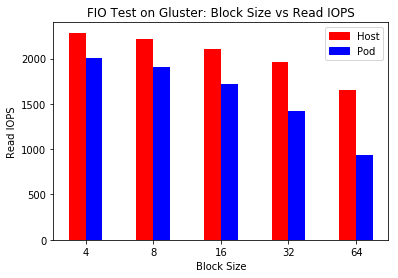

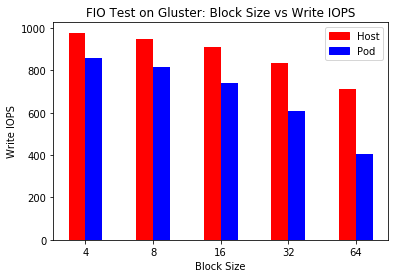

In [15]:
# GLUSTER BLOCK SIZE READ
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_gluster_bs_read_iops)
y_pod = take_median(pod_gluster_bs_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on Gluster: Block Size vs Read IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "test" )



# GLUSTER BLOCK SIZE WRITE
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_gluster_bs_write_iops)
y_pod = take_median(pod_gluster_bs_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on Gluster: Block Size vs Write IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "test" )



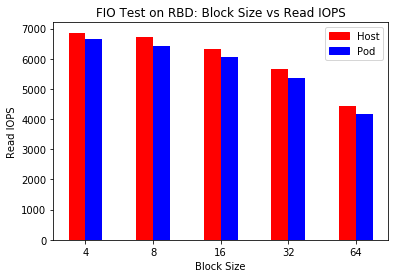

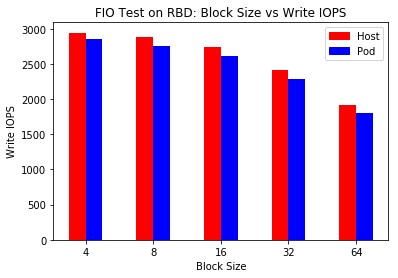

In [20]:
# RBD BLOCK SIZE READ
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_rbd_bs_read_iops)
y_pod = take_median(pod_rbd_bs_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on RBD: Block Size vs Read IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "test" )



# RBD BLOCK SIZE WRITE
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_rbd_bs_write_iops)
y_pod = take_median(pod_rbd_bs_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on RBD: Block Size vs Write IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "test" )



In [123]:

d = { 4: [], 8: [], 16: [], 32: [], 64:[] }
#print sorted(np.asarray(d.keys()))
print sorted(d.keys())

KeyError: 0